In [ ]:
import os
import joblib
import time
import numpy as np
import pandas as pd
import sklearn as sk
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, f1_score
from sklearn.ensemble import RandomForestClassifier
import imblearn.pipeline as pl
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, SVMSMOTE
plt.style.use('seaborn')
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/FinalTestData.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.head()

date  total_usg  mels_S  lig_S  mels_N     hvac_N  \
0  9/15/201810:00:00AM      76.35   2.320    0.1   8.725  39.574500   
1  9/15/201810:15:00AM      69.18   2.290    0.1   8.500  38.684286   
2  9/15/201810:30:00AM      52.15   2.295    0.1   8.275  22.583333   
3  9/15/201810:45:00AM      57.18   2.300    0.1   8.050  27.665789   
4  9/15/201811:00:00AM      68.92   2.100    0.1   8.350  38.834000   

      hvac_S  air_temp_set_1  air_temp_set_2  dew_point_temperature_set_1d  \
0  25.629500           12.21           12.23                          8.90   
1  19.606154           12.07           11.97                          9.56   
2  18.893684           12.11           11.97                          9.85   
3  19.060000           12.02           11.91                          9.88   
4  19.538500           11.94           11.83                          9.80   

   ...  rtu_003_pa_static_stpt_tn  rtu_004_pa_static_stpt_tn  rtu_001_sa_temp  \
0  ...                        0.6                       0.06             67.9   
1  ...                        0.6                       0.06             67.6   
2  ...                        0.6                       0.06             67.4   
3  ...                        0.6                       0.06             68.3   
4  ...                        0.6                       0.06             68.4   

   rtu_002_sa_temp  rtu_003_sa_temp  rtu_004_sa_temp  rtu_001_sat_sp_tn  \
0             64.5             65.2             67.8               68.0   
1             63.8             65.0             69.0               68.0   
2             63.6             62.7             69.1               68.0   
3             63.8             64.8             68.2               68.0   
4             63.6             63.2             66.9               68.0   

   rtu_002_sat_sp_tn  rtu_003_sat_sp_tn  rtu_004_sat_sp_tn  
0               65.0               64.0               68.0  
1               65.0               64.0               68.0  
2               65.0               64.0               68.0  
3               65.0               64.0               68.0  
4               65.0               64.0               68.0  

[5 rows x 167 columns]

In [ ]:
df.fillna(df.mean(), inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


#Graphs

In [ ]:
from statsmodels.compat import lzip
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
df_few= df.head(20)

visual_model = ols("total_usg ~ air_temp_set_1 + dew_point_temperature_set_1d + relative_humidity_set_1 + solar_radiation_set_1 + zone_016_cooling_sp  + cerc_templogger_1  + hp_hws_temp + rtu_001_econ_stpt_tn + rtu_001_sf_vfd_spd_fbk_tn + rtu_001_ma_temp + rtu_001_oadmpr_pct + rtu_001_oa_flow_tn + rtu_001_oa_temp + rtu_001_fltrd_gnd_lvl_plenum_press_tn + rtu_001_ra_temp + rtu_001_fltrd_sa_flow_tn + rtu_001_pa_static_stpt_tn ", data=df_few).fit()
print(visual_model.summary())

                            OLS Regression Results                            
Dep. Variable:              total_usg   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     1.595
Date:                Tue, 23 Aug 2022   Prob (F-statistic):              0.318
Time:                        11:34:27   Log-Likelihood:                -53.150
No. Observations:                  20   AIC:                             136.3
Df Residuals:                       5   BIC:                             151.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

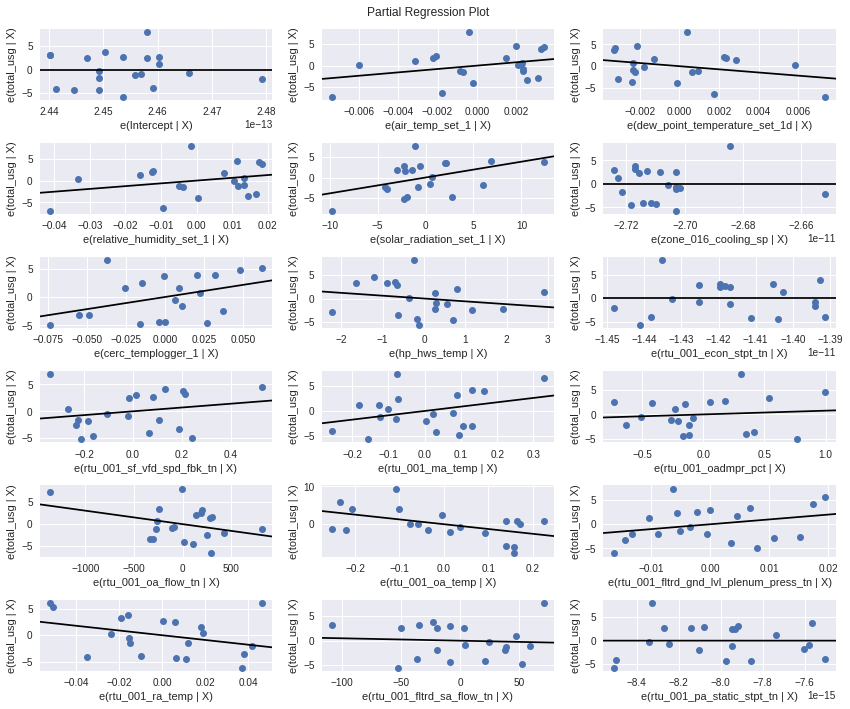

In [ ]:
figr = plt.figure(figsize=(12, 10))
fig = sm.graphics.plot_partregress_grid(visual_model, fig= figr, grid = (6,3))


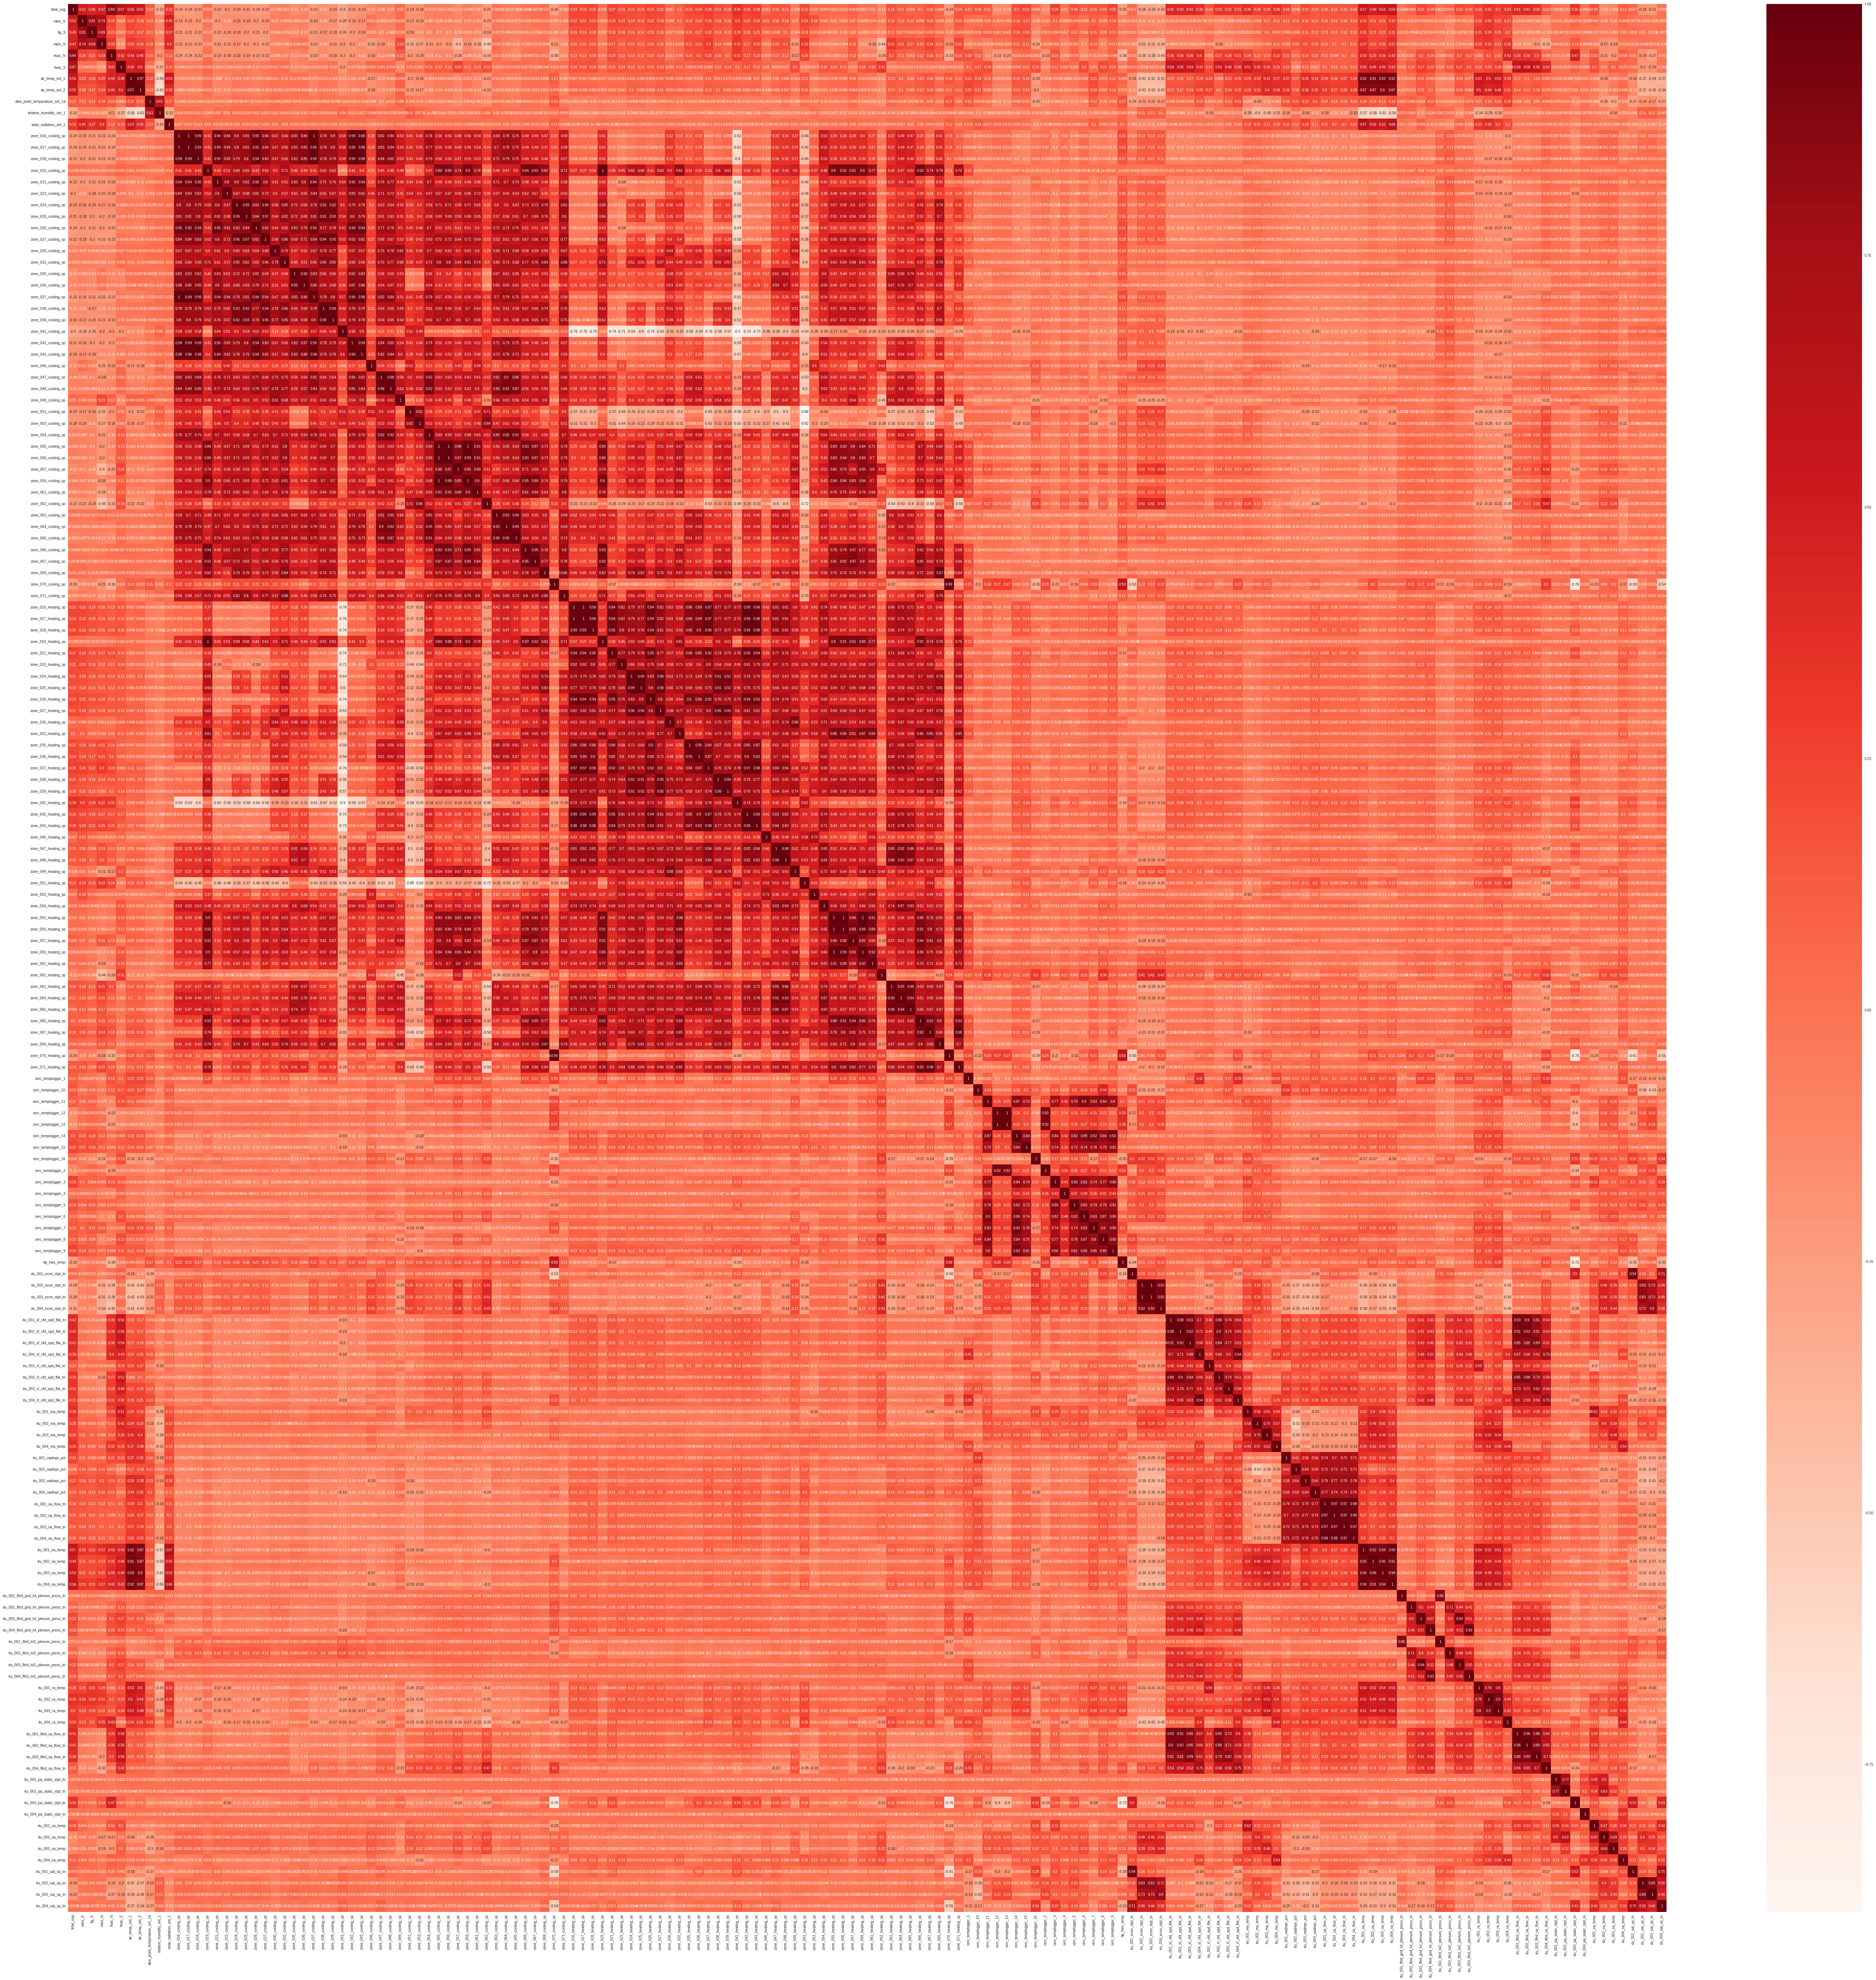

In [ ]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Using Pearson Correlation
plt.figure(figsize=(100,98))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
#Correlation with output variable
cor_target = abs(cor["total_usg"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.3]
relevant_features

total_usg                    1.000000
mels_S                       0.510141
lig_S                        0.447489
mels_N                       0.473539
hvac_N                       0.844655
hvac_S                       0.667892
air_temp_set_1               0.555332
air_temp_set_2               0.552406
relative_humidity_set_1      0.322972
solar_radiation_set_1        0.323853
zone_041_heating_sp          0.356163
rtu_004_econ_stpt_tn         0.308245
rtu_001_sf_vfd_spd_fbk_tn    0.418967
rtu_002_sf_vfd_spd_fbk_tn    0.419674
rtu_003_sf_vfd_spd_fbk_tn    0.409302
rtu_004_sf_vfd_spd_fbk_tn    0.380551
rtu_002_rf_vfd_spd_fbk_tn    0.334427
rtu_003_rf_vfd_spd_fbk_tn    0.323292
rtu_004_rf_vfd_spd_fbk_tn    0.309585
rtu_001_ma_temp              0.363205
rtu_004_ma_temp              0.358928
rtu_001_oa_temp              0.571123
rtu_002_oa_temp              0.491815
rtu_003_oa_temp              0.530186
rtu_004_oa_temp              0.564581
rtu_002_ra_temp              0.349612
rtu_003_ra_t

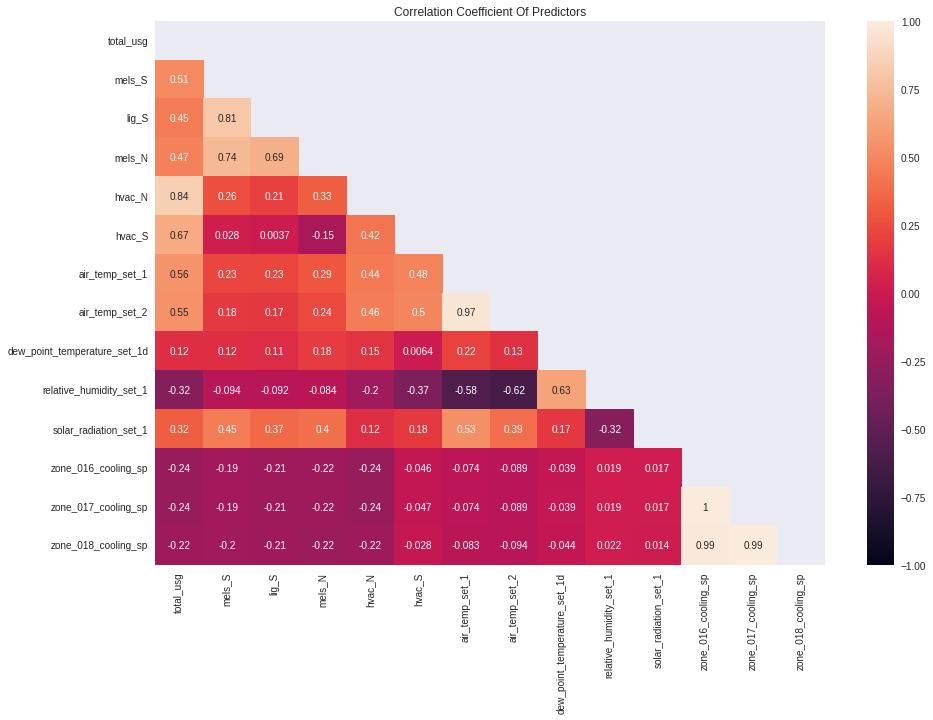

In [ ]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns

df_col= df.iloc[:,0:15]
# set figure size
plt.figure(figsize=(25,20))

# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(df_col.corr(), dtype=bool))

# generate heatmap
sns.heatmap(df_col.corr(), annot=True, mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Coefficient Of Predictors')
plt.show()

#Variance Inflation Factor

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#X= df[['total_usg', 'air_temp_set_1','air_temp_set_2','dew_point_temperature_set_1d','relative_humidity_set_1','solar_radiation_set_1','hp_hws_temp','rtu_001_econ_stpt_tn','rtu_002_econ_stpt_tn']]

X= df.iloc[:,7:167]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [ ]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(vif_data)

                                   feature        VIF
0                           air_temp_set_1  7.630e+02
1                           air_temp_set_2  4.909e+02
2             dew_point_temperature_set_1d  5.446e+01
3                  relative_humidity_set_1  3.447e+02
4                    solar_radiation_set_1  7.555e+00
5                      zone_016_cooling_sp  2.698e+06
6                      zone_017_cooling_sp  2.289e+06
7                      zone_018_cooling_sp  1.610e+05
8                      zone_019_cooling_sp  1.506e+05
9                      zone_021_cooling_sp  1.080e+05
10                     zone_023_cooling_sp  2.649e+03
11                     zone_024_cooling_sp  7.794e+04
12                     zone_025_cooling_sp  9.206e+04
13                     zone_026_cooling_sp  1.231e+05
14                     zone_027_cooling_sp  1.141e+05
15                     zone_030_cooling_sp  2.900e+05
16                     zone_032_cooling_sp  8.315e+04
17                     zone_

#Preprocessing

In [ ]:
# Normalizing the data
from sklearn import preprocessing
x=df[['air_temp_set_1','relative_humidity_set_1','solar_radiation_set_1','zone_041_heating_sp','rtu_004_econ_stpt_tn','rtu_002_sf_vfd_spd_fbk_tn','rtu_002_rf_vfd_spd_fbk_tn','rtu_001_oa_temp','rtu_002_ra_temp','rtu_002_fltrd_sa_flow_tn','rtu_003_fltrd_sa_flow_tn','rtu_003_pa_static_stpt_tn']]
y=df['total_usg']
x = preprocessing.normalize(x)

In [ ]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 0)

#Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=2, random_state=0)

regr.fit(x_train, y_train)



RandomForestRegressor(max_depth=2, random_state=0)

In [ ]:
y_pred = regr.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mse = mean_squared_error(y_test, y_pred)
r = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
print("Mean Squared Error:",mse)
print("R score:",r)
print("Mean Absolute Error:",mae)

Mean Squared Error: 265.1842882806633
R score: 0.3755499235942452
Mean Absolute Error: 11.496635283563739


#RF + GridSearch

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(n_estimators=100,max_features="auto",max_depth=14, random_state=0)

regr.fit(x_train, y_train)

RandomForestRegressor(max_depth=14, random_state=0)

In [ ]:
y_pred = regr.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mse = mean_squared_error(y_test, y_pred)
r = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
print("Mean Squared Error:",mse)
print("R score:",r)
print("Mean Absolute Error:",mae)

Mean Squared Error: 74.40436254256582
R score: 0.8247942584537554
Mean Absolute Error: 5.0950163769206975


#Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

rfc=RandomForestRegressor(random_state=0)

# defining parameter range
param_grid = {
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    }
 
grid = GridSearchCV(estimator=rfc, param_grid=param_grid, verbose= 5)
 
# fitting the model for grid search
grid.fit(x_train, y_train)

KeyboardInterrupt: ignored

In [ ]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

In [ ]:
grid_predictions = grid.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
r = r2_score(y_test, grid_predictions )

print("R score:",r)

#Best Feature Selection

In [ ]:
from sklearn.ensemble import RandomForestRegressor
clf= RandomForestRegressor(n_estimators=100,max_features="auto",max_depth=14, random_state=0)

from sklearn.feature_selection import SelectKBest
anova_filter = SelectKBest(k=70)

pipe = Pipeline(steps=[('anova', anova_filter),('rf', clf)])

In [ ]:
# Fit the pipeline to the training data.
pipe.fit(x_train,y_train)

# Predict the dependent variable of the test set.
y_pred = pipe.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mse = mean_squared_error(y_test, y_pred)
r = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
print("Mean Squared Error:",mse)
print("R score:",r)
print("Mean Absolute Error:",mae)

Mean Squared Error: 93.45196280700651
R score: 0.779941392103364
Mean Absolute Error: 5.639871931542032


#PCA + Random Forest

In [ ]:
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
from sklearn.decomposition import PCA
n_components = 148
print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, x_train.shape[0]))

pca = PCA(n_components=n_components, whiten=True).fit(x_train)

Extracting the top 148 eigenfaces from 71478 faces


In [ ]:
variance = pca.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)

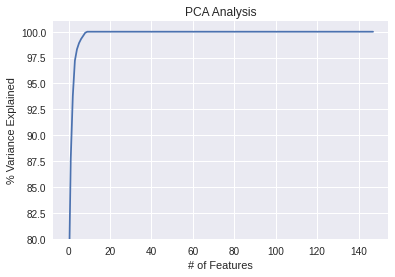

In [ ]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(80,101)
plt.style.context('seaborn-whitegrid')
plt.plot(var)

In [ ]:
pca = PCA(n_components=30)

In [ ]:
from enum import auto
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(n_estimators=100,max_features="auto",max_depth=14, random_state=0)
pipe = Pipeline(steps=[('pca', pca),('rf', clf)])

In [ ]:
pipe

Pipeline(steps=[('pca', PCA(n_components=30)),
                ('rf', RandomForestRegressor(max_depth=14, random_state=0))])

In [ ]:
# Fit the pipeline to the training data.
pipe.fit(x_train, y_train)

# Predict the dependent variable of the test set.
y_pred = pipe.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mse = mean_squared_error(y_test, y_pred)
r = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
print("Mean Squared Error:",mse)
print("R score:",r)
print("Mean Absolute Error:",mae)

Mean Squared Error: 79.69938885997088
R score: 0.8123256480020887
Mean Absolute Error: 5.480336358727941


#XGBoost Regressor

In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor

#params = {
 #   "n_estimators": 500,
  #  "max_depth": 4,
   # "min_samples_split": 5,
    #"learning_rate": 0.01,
    #"loss": "squared_error",
#}

reg = HistGradientBoostingRegressor()
reg.fit(x_train, y_train)



HistGradientBoostingRegressor()

In [ ]:
y_pred = reg.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mse = mean_squared_error(y_test, y_pred)
r = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
print("Mean Squared Error:",mse)
print("R score:",r)
print("Mean Absolute Error:",mae)

Mean Squared Error: 68.97842770410467
R score: 0.8375711293853534
Mean Absolute Error: 5.076909363535559


#Artificial Neural Network

In [ ]:
import math
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import MeanSquaredLogarithmicError

In [ ]:
hidden_units1 = 160
hidden_units2 = 480
hidden_units3 = 256
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model
# build the model
model = build_model_using_sequential()

In [ ]:
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)

# train the model
history = model.fit(
    x_train, 
    y_train, 
    epochs=20, 
    batch_size=64,
    validation_split=0.2
)

Epoch 1/20
894/894 [==============================] - 8s 8ms/step - loss: 0.2344 - mean_squared_logarithmic_error: 0.2343 - val_loss: 0.1202 - val_mean_squared_logarithmic_error: 0.1202
Epoch 2/20
894/894 [==============================] - 6s 7ms/step - loss: 0.1315 - mean_squared_logarithmic_error: 0.1315 - val_loss: 0.1126 - val_mean_squared_logarithmic_error: 0.1126
Epoch 3/20
894/894 [==============================] - 7s 7ms/step - loss: 0.1276 - mean_squared_logarithmic_error: 0.1277 - val_loss: 0.1095 - val_mean_squared_logarithmic_error: 0.1095
Epoch 4/20
894/894 [==============================] - 7s 7ms/step - loss: 0.1317 - mean_squared_logarithmic_error: 0.1317 - val_loss: 0.1188 - val_mean_squared_logarithmic_error: 0.1189
Epoch 5/20
894/894 [==============================] - 7s 7ms/step - loss: 0.1315 - mean_squared_logarithmic_error: 0.1315 - val_loss: 0.1324 - val_mean_squared_logarithmic_error: 0.1324
Epoch 6/20
894/894 [==============================] - 7s 7ms/step - lo

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mse = mean_squared_error(y_test, y_pred)
r = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
print("Mean Squared Error:",mse)
print("R score:",r)
print("Mean Absolute Error:",mae)

Mean Squared Error: 303.5321144009477
R score: 0.28524931375772977
Mean Absolute Error: 14.098150150681276


#Super Ensemble - Stacking

In [ ]:

# example of a super learner model for regression
from math import sqrt
from numpy import hstack
from numpy import vstack
from numpy import asarray
from sklearn.datasets import make_regression
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import StackingRegressor

In [ ]:
# create a list of base-models
estimators = [
    ('lr', LinearRegression()),
    ('en', ElasticNet()),
    ('dtr', DecisionTreeRegressor()),
    ('kn', KNeighborsRegressor()),
    ('ada', AdaBoostRegressor()),
    ('br', BaggingRegressor(n_estimators=100)),
    ('etr', ExtraTreesRegressor(n_estimators=100))

]

In [ ]:
reg = StackingRegressor( estimators= estimators ,final_estimator=RandomForestRegressor(n_estimators=100,random_state=0))

In [ ]:
reg.fit(x_train,y_train)

y_pred= reg.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mse = mean_squared_error(y_test, y_pred)
r = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
print("Mean Squared Error:",mse)
print("R score:",r)
print("Mean Absolute Error:",mae)

Mean Squared Error: 49.45670270666477
R score: 0.8835404541340414
Mean Absolute Error: 4.08889984310718


#Super Ensemble 2

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

estimators = [
    ("Random Forest", RandomForestRegressor(random_state=0)),
    ("Lasso", LassoCV()),
    ("Gradient Boosting", HistGradientBoostingRegressor(random_state=0)),
]

stacking_regressor = StackingRegressor(estimators=estimators, final_estimator=RidgeCV())



In [ ]:
stacking_regressor.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8206.238564865664, tolerance: 2402.4277112265363
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7819.474861457944, tolerance: 2402.4277112265363
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5428.996703309938, tolerance: 2402.4277112265363
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4148.6232

StackingRegressor(estimators=[('Random Forest',
                               RandomForestRegressor(random_state=0)),
                              ('Lasso', LassoCV()),
                              ('Gradient Boosting',
                               HistGradientBoostingRegressor(random_state=0))],
                  final_estimator=RidgeCV(alphas=array([ 0.1,  1. , 10. ])))

In [ ]:
y_pred= stacking_regressor.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mse = mean_squared_error(y_test, y_pred)
r = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
print("Mean Squared Error:",mse)
print("R score:",r)
print("Mean Absolute Error:",mae)

Mean Squared Error: 51.24664710491492
R score: 0.8793255327919957
Mean Absolute Error: 4.1789294855194425


#PCA + Super Ensemble

In [ ]:
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
from sklearn.decomposition import PCA
n_components = 148
print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, x_train.shape[0]))

pca = PCA(n_components=n_components, whiten=True).fit(x_train)

Extracting the top 148 eigenfaces from 71478 faces


In [ ]:
variance = pca.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)

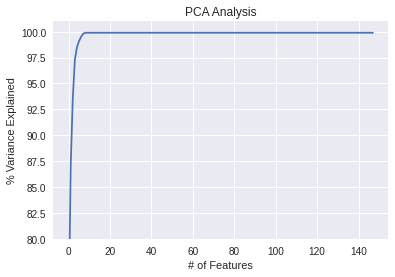

In [ ]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(80,101)
plt.style.context('seaborn-whitegrid')
plt.plot(var)

In [ ]:
pca = PCA(n_components=30)

In [ ]:

# example of a super learner model for regression
from math import sqrt
from numpy import hstack
from numpy import vstack
from numpy import asarray
from sklearn.datasets import make_regression
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import StackingRegressor

In [ ]:
# create a list of base-models
estimators = [
    ('lr', LinearRegression()),
    ('en', ElasticNet()),
    ('dtr', DecisionTreeRegressor()),
    ('kn', KNeighborsRegressor()),
    ('ada', AdaBoostRegressor()),
    ('br', BaggingRegressor(n_estimators=100)),
    ('etr', ExtraTreesRegressor(n_estimators=100))

]

In [ ]:
reg = StackingRegressor( estimators= estimators ,final_estimator=RandomForestRegressor(n_estimators=100,random_state=0))
pipe = Pipeline(steps=[('pca', pca),('rf', reg)])

In [ ]:
# Fit the pipeline to the training data.
pipe.fit(x_train, y_train)



Pipeline(steps=[('pca', PCA(n_components=30)),
                ('rf',
                 StackingRegressor(estimators=[('lr', LinearRegression()),
                                               ('en', ElasticNet()),
                                               ('dtr', DecisionTreeRegressor()),
                                               ('kn', KNeighborsRegressor()),
                                               ('ada', AdaBoostRegressor()),
                                               ('br',
                                                BaggingRegressor(n_estimators=100)),
                                               ('etr', ExtraTreesRegressor())],
                                   final_estimator=RandomForestRegressor(random_state=0)))])

In [ ]:
# Predict the dependent variable of the test set.
y_pred = pipe.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mse = mean_squared_error(y_test, y_pred)
r = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
print("Mean Squared Error:",mse)
print("R score:",r)
print("Mean Absolute Error:",mae)

Mean Squared Error: 57.3869049099686
R score: 0.8648665899927197
Mean Absolute Error: 4.507281887293077
